In [15]:
# Classification for iris and mnist
# includes cross validation for alpha - pruning paramaeter

from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import Image  


import numpy as np
import matplotlib.pylab as pl
import pydotplus




# Load data
iris = datasets.load_iris()
X = iris.data
y = iris.target
print(X.shape)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test


clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

print("Number of nodes is:",clf.tree_.n_leaves)
print("Depth is:",clf.tree_.max_depth)


accuracy = clf.score(X_test,y_test)
accuracy *= 100
print("Accuracy %:",accuracy)






(150, 4)
Number of nodes is: 6
Depth is: 5
Accuracy %: 95.55555555555556


In [16]:
parameters = [{'ccp_alpha': [.01,.1, .2,.4, .6]}]
clf = GridSearchCV(tree.DecisionTreeClassifier(max_depth=5), parameters)
clf.fit(X_train, y_train)

tree_model = clf.best_estimator_

print (clf.best_score_, clf.best_params_) 
print("Number of nodes is:",tree_model.tree_.n_leaves)
print("Depth is:",tree_model.tree_.max_depth)

accuracy = tree_model.score(X_test,y_test)
accuracy *= 100
print("Accuracy %:",accuracy)


0.9523809523809523 {'ccp_alpha': 0.01}
Number of nodes is: 6
Depth is: 5
Accuracy %: 95.55555555555556


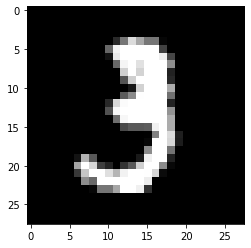

Number of nodes is: 852
Depth is: 10
Accuracy %: 86.59


In [19]:
import mnist

X_train = mnist.train_images()
y_train = mnist.train_labels()

test_imagesall = mnist.test_images()
test_labelsall = mnist.test_labels()

X_test = test_imagesall
y_test = test_labelsall

im = X_train[10,:,:]
pl.imshow(im, cmap='gray')
pl.show()

# Flatten the images.
X_train = X_train.reshape((-1, 784))
X_test = X_test.reshape((-1, 784))

clf = DecisionTreeClassifier(max_depth=10)

clf.fit(X_train, y_train)

print("Number of nodes is:",clf.tree_.n_leaves)
print("Depth is:",clf.tree_.max_depth)


accuracy = clf.score(X_test,y_test)
accuracy *= 100
print("Accuracy %:",accuracy)


In [20]:
parameters = [{'ccp_alpha': [.01,.1, .2]}]
clf = GridSearchCV(tree.DecisionTreeClassifier(max_depth=10), parameters)
clf.fit(X_train, y_train)

tree_model = clf.best_estimator_

print (clf.best_score_, clf.best_params_) 
print("Number of nodes is:",tree_model.tree_.n_leaves)
print("Depth is:",tree_model.tree_.max_depth)

accuracy = tree_model.score(X_test,y_test)
accuracy *= 100
print("Accuracy %:",accuracy)


0.6227833333333332 {'ccp_alpha': 0.01}
Number of nodes is: 16
Depth is: 5
Accuracy %: 62.68
